# Skill Finder Analysis

The main problems we want to focus on:

1. For each state, how many jobs are available (could create heat map if possible)

2. For each state, list the top 5 cities with most jobs available.

3. List 10 companies that offer most technology jobs (if use Kaggle dataset)

4. Among all the jobs, count the number of occurrence for each skill and list the top10 popular skills

5. For the five cites with most jobs, list the top5 popular skills (check whether the need for skills may vary among cities)

6. The top five popular Database used

7. For each education level, what’s the average years of experience needed.

8. Based on the years of experience, compare the number of jobs available that needs YOE =0(New Grad), 1-4(Junior), >5(Senior).

9. Compare whether skills needed for different job titles vary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
SDEio = 'SoftwareEngineerData/outputSoftwareEngineer.xlsx'
DSio = 'DataScientistData/outputDataScientist.xlsx'
kaggleio = 'outputKaggle.xlsx'

In [3]:
sde_data = pd.read_excel(io=SDEio)
ds_data = pd.read_excel(io=DSio)
kaggle_data = pd.read_excel(io=kaggleio)

In [4]:
kaggle_data

,Unnamed: 0,company,employmenttype_jobstatus,jobid,joblocation_address,jobtitle,shift,site_name,uniq_id,python,...,perforce,maya,blockchain,rust,haskell,erlang,clojure,html5,YOE,Min Ed Level
0,0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,NaN,418ff92580b270ef4e7c14f0ddfc36b4,0,...,0,0,0,0,0,0,0,0,1.0,NaN
1,1,University of Chicago/IT Services,Full Time,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,Telecommuting not available|Travel not required,NaN,8aec88cba08d53da65ab99cf20f6f9d9,1,...,0,0,0,0,0,0,0,0,2.0,bachelor
2,2,"Galaxy Systems, Inc.",Full Time,Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,Telecommuting not available|Travel not required,NaN,46baa1f69ac07779274bcd90b85d9a72,0,...,0,0,0,0,0,0,0,0,5.0,NaN
3,3,TransTech LLC,Full Time,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,NaN,3941b2f206ae0f900c4fba4ac0b18719,0,...,0,0,0,0,0,0,0,0,2.0,bachelor
4,4,Matrix Resources,Full Time,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,Telecommuting not available|Travel not required,NaN,45efa1f6bc65acc32bbbb953a1ed13b7,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,5,Yash Technologies,"Full Time, Permanant",Dice Id : 10111847,"Chicago, IL",SAP FICO Architect,Telecommuting not available|Travel required to...,NaN,e0ac9d926dda5e95162ef05adea7318c,0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,6,Noble1,"Full Time, Direct Hire",Dice Id : 90884761,"Atlanta, GA",Network Engineer,Telecommuting not available|Travel not required,NaN,e7e326053c586bd94e59f1fd74de4a1b,0,...,0,0,0,0,0,0,0,0,NaN,NaN
7,7,"Bluebeam Software, Inc.","Full Time, Full Time",Dice Id : 10110132,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,Telecommuting not available|Travel not required,NaN,b0dadecf4c3c2beecb9c773ca11ecda4,0,...,0,0,0,0,0,0,0,0,5.0,bachelor
8,8,Genesis10,"Full Time, Direct Placement",Dice Id : gentx001,"New York, NY",Front End Developer,Telecommuting not available|Travel not required,NaN,28f5e0c1cc3314813e674f0c32b04d1b,0,...,0,0,0,0,0,0,0,0,3.0,NaN
9,9,"VanderHouwen & Associates, Inc.","C2H W2, Contract to hire",Dice Id : vhassoc,"Seattle, WA",Application Support Engineer,Telecommuting not available|Travel not required,NaN,95c9127e2770172f454f3b83981eaa88,0,...,0,0,0,0,0,0,0,1,NaN,NaN


In [5]:
sde_data

,Unnamed: 0,description,python,scala,.net,c#,matlab,simulink,linux,agile,...,rust,haskell,erlang,clojure,html5,zip,state,city,YOE,Min Ed Level
0,100233903,spacex was founded under the belief that a fut...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,NaN
1,106869885,ebsco information services (eis) provides a co...,0,1,1,1,0,0,0,1,...,0,0,0,0,0,NaN,al,birmingham,1.0,bachelor
2,113708722,spacex was founded under the belief that a fut...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,NaN
3,123862058,spacex was founded under the belief that a fu...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
4,126245384,spacex was founded under the belief that a fut...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
5,135081815,summary summary\n\n\n\njobs\n\n\n\n\n\n\nsearc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35233.0,al,birmingham,3.0,associate
6,138087783,summary summary\n\n\n\njobs\n\n\n\n\n\n\nsearc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35233.0,al,birmingham,3.0,associate
7,142979972,spacex was founded under the belief that a fut...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ca,hawthorne,2.0,bachelor
8,143163409,sierra nevada corporationâ€™s electronic and i...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,75023.0,tx,plano,NaN,NaN
9,146117027,primarily responsible for the day-to-day manag...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,44101.0,oh,cleveland,5.0,bachelor


In [6]:
ds_data

,Unnamed: 0,description,python,scala,.net,c#,matlab,simulink,linux,agile,...,rust,haskell,erlang,clojure,html5,zip,state,city,YOE,Min Ed Level
0,145347322,"headquartered in lynchburg, va., bwx technolog...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,va,lynchburg,3.0,master
1,145347326,"headquartered in lynchburg, va., bwx technolog...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,tn,oak ridge,3.0,master
2,150181058,\n\n\n\njobs\n\n\n\n\n\n\nsearch jobs\n\n\n\n\...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,in,indianapolis,5.0,master
3,151232338,job summaryessential duties and responsibiliti...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ma,boston,NaN,NaN
4,151236031,core technologies used in the data science tea...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,wa,seattle,2.0,master
5,153868726,"â help lead the design, development, and relea...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,va,arlington,1.0,NaN
6,155732777,data scientist & senior data scientistlocation...,1,0,0,0,1,0,0,0,...,0,0,0,0,0,NaN,ny,new york,2.0,NaN
7,155761486,title: developer - seniorlocation: overland p...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,ks,overland park,4.0,NaN
8,155826457,where good people build rewarding careers.thin...,1,0,0,0,1,0,0,0,...,0,0,0,0,0,NaN,il,northbrook,NaN,master
9,155826497,where good people build rewarding careers.thin...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,wa,bothell,NaN,NaN


### For each state, how many jobs are available (could create heat map if possible)

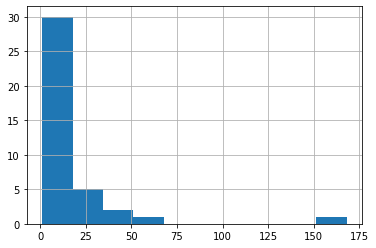

In [7]:
sde_data['state'].value_counts().hist()

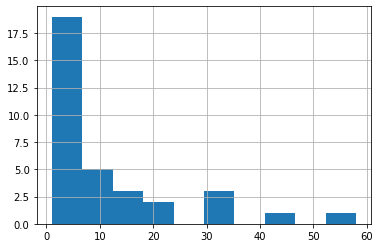

In [8]:
ds_data['state'].value_counts().hist()

In [9]:
set(kaggle_data['joblocation_address'])

{nan,
 'Menomonee Falls, WI',
 'Evansville, IN',
 'New Bern, NC',
 'Princeton, NJ',
 'Cerritos, CA',
 'Carrollton, TX',
 'Dublin And Santa Jose, CA',
 'Linthicum, MD',
 'Oakton, VA',
 'Miami Beach, FL',
 'Carteret, NJ',
 'Richmond, CA',
 'North Branch, NJ',
 'Mayfield, OH',
 'Lakeside, VA',
 'Lafayette, CO',
 'D, WA',
 'Oconomowoc, WI',
 'Linthicum Heights, MD',
 'Westboro, MA',
 'Madison, MO',
 'Tumwater, WA',
 'Roswell, GA',
 'Los Angeles, CA',
 'Folsom, CA',
 'Sheboygan, WI',
 'New York, PA',
 'Hamilton, VA',
 'Redondo Beach, CA',
 'Novi, MI',
 'Davie, FL',
 'Johns Creek, GA',
 'Niwot, CO',
 'Norwalk, CT',
 'Boulder, CO',
 'Coconut Creek, FL',
 'Sunnyvale, CA',
 'Agawam, MA',
 'El Segundo, CA',
 'The Woodlands, TX',
 'Clinton, CT',
 'Beachwood, OH',
 'Edgewater Park, NJ',
 'Paramus, NJ',
 'Fullerton, CA',
 'Bethel, CT',
 'Draper, UT',
 'Bel Air, MD',
 'Oaks, PA',
 'Saint Petersburg, FL',
 'Pennington, NJ',
 'Cranston, RI',
 'Washington, Dc, DC',
 'Lansdale, PA',
 'Coopersburg, PA',


In [10]:
data = kaggle_data['joblocation_address'].value_counts()[0:5]
labels = kaggle_data['joblocation_address'].value_counts().index.tolist()[0:5]

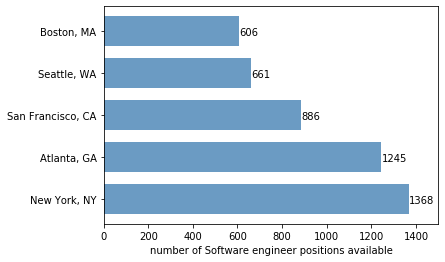

In [11]:
plt.barh(range(5), data, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(5), labels)
plt.xlim(0,1500)
plt.xlabel("number of Software engineer positions available")
plt.title("")
for x, y in enumerate(data):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

In [12]:
labels

['New York, NY',
 'Atlanta, GA',
 'San Francisco, CA',
 'Seattle, WA',
 'Boston, MA']

In [13]:
data

New York, NY         1368
Atlanta, GA          1245
San Francisco, CA     886
Seattle, WA           661
Boston, MA            606
Name: joblocation_address, dtype: int64

### For each state, list the top 5 cities with most jobs available.

In [14]:
sde_data['state'].value_counts().get('ca')

168

In [15]:
dic = {}
for col in sde_data.columns: 
    temp = sde_data[col].value_counts().get(1)
    if temp is not None:
        dic[col] = temp

In [16]:
dic

{'Unnamed: 0': 1,
 'python': 160,
 'scala': 110,
 '.net': 87,
 'c#': 122,
 'matlab': 19,
 'simulink': 6,
 'linux': 124,
 'agile': 153,
 'ns3': 2,
 'opnet': 2,
 'snmp': 5,
 'rmon': 2,
 'wireshark': 4,
 'penetration testing': 2,
 'java': 250,
 'secure boot': 2,
 'tcp/ip': 15,
 'udp': 8,
 'javascript': 152,
 'mongodb': 16,
 'mysql': 49,
 'amazon web services': 18,
 'aws': 112,
 'oracle': 47,
 'redis': 13,
 'react': 87,
 'backbone': 3,
 'angular': 76,
 'google cloud platform': 5,
 'html': 64,
 'css': 60,
 'x86': 5,
 'powerpc': 3,
 'arm': 43,
 'device drivers': 5,
 'vmware esx': 6,
 'nosql': 41,
 'sql': 174,
 'bitbucket': 8,
 'confluence': 9,
 'jenkins': 43,
 'doxygen': 2,
 'communication': 227,
 'teamwork': 27,
 'dspace': 2,
 'vehiclespy': 2,
 'canalyzer': 3,
 'webgl': 5,
 'distributed': 91,
 'kafka': 19,
 'angularjs': 23,
 'mithrilinteractive': 2,
 'ui/ux': 8,
 'opengl': 9,
 'ios': 61,
 'android': 34,
 'julia': 3,
 'visualbasic': 2,
 'cobol': 2,
 'jira': 31,
 'gitlab': 6,
 'redux': 10,
 '

In [17]:
dic = sorted(dic.items(), key=lambda item: item[1], reverse=True)
dic

[('java', 250),
 ('communication', 227),
 ('sql', 174),
 ('python', 160),
 ('c++', 155),
 ('agile', 153),
 ('javascript', 152),
 ('git', 148),
 ('linux', 124),
 ('c#', 122),
 ('aws', 112),
 ('scala', 110),
 ('YOE', 108),
 ('distributed', 91),
 ('.net', 87),
 ('react', 87),
 ('angular', 76),
 ('html', 64),
 ('ios', 61),
 ('css', 60),
 ('state', 59),
 ('mysql', 49),
 ('oracle', 47),
 ('docker', 47),
 ('machine learning', 44),
 ('arm', 43),
 ('jenkins', 43),
 ('nosql', 41),
 ('devops', 40),
 ('kubernetes', 40),
 ('unix', 39),
 ('oop', 39),
 ('rust', 39),
 ('android', 34),
 ('jira', 31),
 ('json', 29),
 ('perl', 28),
 ('teamwork', 27),
 ('city', 27),
 ('puppet', 25),
 ('rest api', 24),
 ('angularjs', 23),
 ('xml', 23),
 ('html5', 20),
 ('matlab', 19),
 ('kafka', 19),
 ('s3', 19),
 ('amazon web services', 18),
 ('hadoop', 18),
 ('spark', 18),
 ('golang', 18),
 ('mongodb', 16),
 ('maven', 16),
 ('tcp/ip', 15),
 ('ansible', 15),
 ('rdbms', 15),
 ('postgresql', 15),
 ('junit', 14),
 ('chef', 1

In [18]:
jobs = []
job_number = []
for each in dic:
    jobs.append(each[0]);
    job_number.append(each[1])

In [19]:
jobs

['java',
 'communication',
 'sql',
 'python',
 'c++',
 'agile',
 'javascript',
 'git',
 'linux',
 'c#',
 'aws',
 'scala',
 'YOE',
 'distributed',
 '.net',
 'react',
 'angular',
 'html',
 'ios',
 'css',
 'state',
 'mysql',
 'oracle',
 'docker',
 'machine learning',
 'arm',
 'jenkins',
 'nosql',
 'devops',
 'kubernetes',
 'unix',
 'oop',
 'rust',
 'android',
 'jira',
 'json',
 'perl',
 'teamwork',
 'city',
 'puppet',
 'rest api',
 'angularjs',
 'xml',
 'html5',
 'matlab',
 'kafka',
 's3',
 'amazon web services',
 'hadoop',
 'spark',
 'golang',
 'mongodb',
 'maven',
 'tcp/ip',
 'ansible',
 'rdbms',
 'postgresql',
 'junit',
 'chef',
 'redis',
 'svn',
 'redux',
 'elasticsearch',
 'cicd',
 'swift',
 'confluence',
 'opengl',
 'rundeck',
 'udp',
 'bitbucket',
 'ui/ux',
 'hbase',
 'rabbitmq',
 'terraform',
 'django',
 'xcode',
 'ruby on rails',
 'graphql',
 'perforce',
 'simulink',
 'vmware esx',
 'gitlab',
 'ms sql server',
 'ec2',
 'snmp',
 'google cloud platform',
 'x86',
 'device drivers',


In [20]:
job_number

[250,
 227,
 174,
 160,
 155,
 153,
 152,
 148,
 124,
 122,
 112,
 110,
 108,
 91,
 87,
 87,
 76,
 64,
 61,
 60,
 59,
 49,
 47,
 47,
 44,
 43,
 43,
 41,
 40,
 40,
 39,
 39,
 39,
 34,
 31,
 29,
 28,
 27,
 27,
 25,
 24,
 23,
 23,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 16,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 11,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1]

In [21]:
select_jobs = jobs[0:5]
selects_job_num = job_number[0:5]

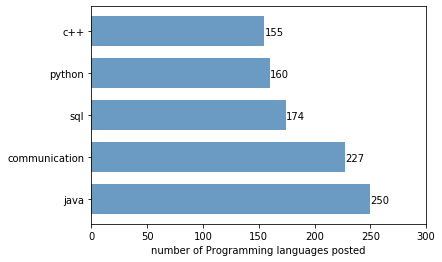

In [22]:
plt.figure()
plt.barh(range(5), selects_job_num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(5), select_jobs)
plt.xlim(0,300)
plt.xlabel("number of Programming languages posted")
plt.title("")
for x, y in enumerate(selects_job_num):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### List 10 companies that offer most technology jobs (if use Kaggle dataset)

In [23]:
data = kaggle_data['company'].value_counts()[0:10]
labels = kaggle_data['company'].value_counts().index.tolist()[0:10]

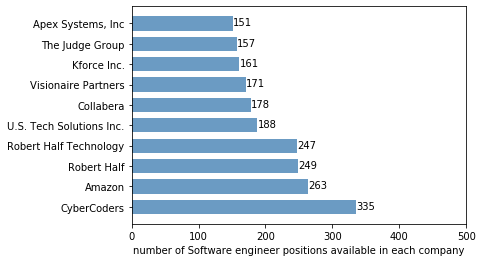

In [24]:
plt.barh(range(10), data, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(10), labels)
plt.xlim(0,500)
plt.xlabel("number of Software engineer positions available in each company")
plt.title("")
for x, y in enumerate(data):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### Among all the jobs, count the number of occurrence for each skill and list the top10 popular skills

In [25]:
dic = {}
for col in sde_data.columns: 
    temp = sde_data[col].value_counts().get(1)
    if temp is not None:
        dic[col] = temp

In [26]:
dic

{'Unnamed: 0': 1,
 'python': 160,
 'scala': 110,
 '.net': 87,
 'c#': 122,
 'matlab': 19,
 'simulink': 6,
 'linux': 124,
 'agile': 153,
 'ns3': 2,
 'opnet': 2,
 'snmp': 5,
 'rmon': 2,
 'wireshark': 4,
 'penetration testing': 2,
 'java': 250,
 'secure boot': 2,
 'tcp/ip': 15,
 'udp': 8,
 'javascript': 152,
 'mongodb': 16,
 'mysql': 49,
 'amazon web services': 18,
 'aws': 112,
 'oracle': 47,
 'redis': 13,
 'react': 87,
 'backbone': 3,
 'angular': 76,
 'google cloud platform': 5,
 'html': 64,
 'css': 60,
 'x86': 5,
 'powerpc': 3,
 'arm': 43,
 'device drivers': 5,
 'vmware esx': 6,
 'nosql': 41,
 'sql': 174,
 'bitbucket': 8,
 'confluence': 9,
 'jenkins': 43,
 'doxygen': 2,
 'communication': 227,
 'teamwork': 27,
 'dspace': 2,
 'vehiclespy': 2,
 'canalyzer': 3,
 'webgl': 5,
 'distributed': 91,
 'kafka': 19,
 'angularjs': 23,
 'mithrilinteractive': 2,
 'ui/ux': 8,
 'opengl': 9,
 'ios': 61,
 'android': 34,
 'julia': 3,
 'visualbasic': 2,
 'cobol': 2,
 'jira': 31,
 'gitlab': 6,
 'redux': 10,
 '

In [27]:
dic = sorted(dic.items(), key=lambda item: item[1], reverse=True)
dic

[('java', 250),
 ('communication', 227),
 ('sql', 174),
 ('python', 160),
 ('c++', 155),
 ('agile', 153),
 ('javascript', 152),
 ('git', 148),
 ('linux', 124),
 ('c#', 122),
 ('aws', 112),
 ('scala', 110),
 ('YOE', 108),
 ('distributed', 91),
 ('.net', 87),
 ('react', 87),
 ('angular', 76),
 ('html', 64),
 ('ios', 61),
 ('css', 60),
 ('state', 59),
 ('mysql', 49),
 ('oracle', 47),
 ('docker', 47),
 ('machine learning', 44),
 ('arm', 43),
 ('jenkins', 43),
 ('nosql', 41),
 ('devops', 40),
 ('kubernetes', 40),
 ('unix', 39),
 ('oop', 39),
 ('rust', 39),
 ('android', 34),
 ('jira', 31),
 ('json', 29),
 ('perl', 28),
 ('teamwork', 27),
 ('city', 27),
 ('puppet', 25),
 ('rest api', 24),
 ('angularjs', 23),
 ('xml', 23),
 ('html5', 20),
 ('matlab', 19),
 ('kafka', 19),
 ('s3', 19),
 ('amazon web services', 18),
 ('hadoop', 18),
 ('spark', 18),
 ('golang', 18),
 ('mongodb', 16),
 ('maven', 16),
 ('tcp/ip', 15),
 ('ansible', 15),
 ('rdbms', 15),
 ('postgresql', 15),
 ('junit', 14),
 ('chef', 1

In [28]:
jobs = []
job_number = []
for each in dic:
    jobs.append(each[0]);
    job_number.append(each[1])

In [29]:
jobs

['java',
 'communication',
 'sql',
 'python',
 'c++',
 'agile',
 'javascript',
 'git',
 'linux',
 'c#',
 'aws',
 'scala',
 'YOE',
 'distributed',
 '.net',
 'react',
 'angular',
 'html',
 'ios',
 'css',
 'state',
 'mysql',
 'oracle',
 'docker',
 'machine learning',
 'arm',
 'jenkins',
 'nosql',
 'devops',
 'kubernetes',
 'unix',
 'oop',
 'rust',
 'android',
 'jira',
 'json',
 'perl',
 'teamwork',
 'city',
 'puppet',
 'rest api',
 'angularjs',
 'xml',
 'html5',
 'matlab',
 'kafka',
 's3',
 'amazon web services',
 'hadoop',
 'spark',
 'golang',
 'mongodb',
 'maven',
 'tcp/ip',
 'ansible',
 'rdbms',
 'postgresql',
 'junit',
 'chef',
 'redis',
 'svn',
 'redux',
 'elasticsearch',
 'cicd',
 'swift',
 'confluence',
 'opengl',
 'rundeck',
 'udp',
 'bitbucket',
 'ui/ux',
 'hbase',
 'rabbitmq',
 'terraform',
 'django',
 'xcode',
 'ruby on rails',
 'graphql',
 'perforce',
 'simulink',
 'vmware esx',
 'gitlab',
 'ms sql server',
 'ec2',
 'snmp',
 'google cloud platform',
 'x86',
 'device drivers',


In [30]:
job_number

[250,
 227,
 174,
 160,
 155,
 153,
 152,
 148,
 124,
 122,
 112,
 110,
 108,
 91,
 87,
 87,
 76,
 64,
 61,
 60,
 59,
 49,
 47,
 47,
 44,
 43,
 43,
 41,
 40,
 40,
 39,
 39,
 39,
 34,
 31,
 29,
 28,
 27,
 27,
 25,
 24,
 23,
 23,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 16,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 11,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1]

In [31]:
select_jobs = jobs[0:10]
selects_job_num = job_number[0:10]

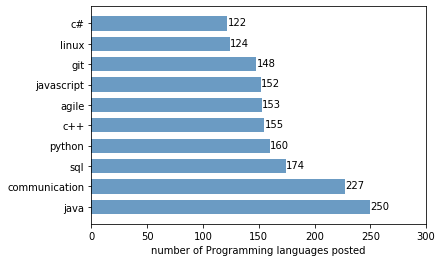

In [32]:
plt.figure()
plt.barh(range(10), selects_job_num, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(10), select_jobs)
plt.xlim(0,300)
plt.xlabel("number of Programming languages posted")
plt.title("")
for x, y in enumerate(selects_job_num):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### For each education level, what’s the average years of experience needed.

In [33]:
yoe_data = kaggle_data[kaggle_data['Min Ed Level'] == 'bachelor']

In [34]:
data = []
labels = []
for key in yoe_data['YOE'].value_counts().index:
    data.append(yoe_data['YOE'].value_counts()[key])
    labels.append(key)

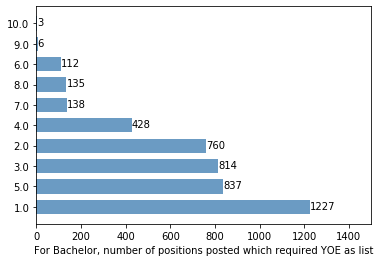

In [35]:
plt.barh(range(10), data, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(10), labels)
plt.xlim(0,1500)
plt.xlabel("For Bachelor, number of positions posted which required YOE as list")
plt.title("")
for x, y in enumerate(data):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

In [36]:
yoe_data = kaggle_data[kaggle_data['Min Ed Level'] == 'master']

In [37]:
data = []
labels = []
for key in yoe_data['YOE'].value_counts().index:
    data.append(yoe_data['YOE'].value_counts()[key])
    labels.append(key)

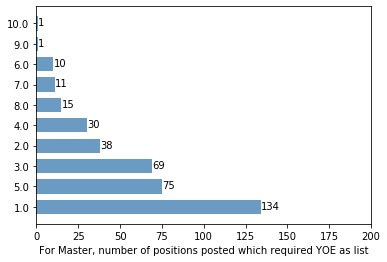

In [38]:
plt.barh(range(10), data, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(10), labels)
plt.xlim(0,200)
plt.xlabel("For Master, number of positions posted which required YOE as list")
plt.title("")
for x, y in enumerate(data):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### Based on the years of experience, compare the number of jobs available that needs YOE =1(New Grad), 2-4(Junior), >5(Senior).

In [50]:
new_grad_data = kaggle_data[kaggle_data['YOE'] == 1.0]['YOE'].value_counts()
junior_data = kaggle_data[(kaggle_data['YOE'] == 4.0) | (kaggle_data['YOE'] == 3.0) | (kaggle_data['YOE'] == 2.0)]['YOE'].value_counts()
senior_data = kaggle_data[kaggle_data['YOE'] >= 5.0]['YOE'].value_counts()

In [51]:
sum(junior_data)

6155

In [52]:
data = [sum(new_grad_data), sum(junior_data), sum(senior_data)]
labels = ['New Grad', 'Junior', 'Senior']

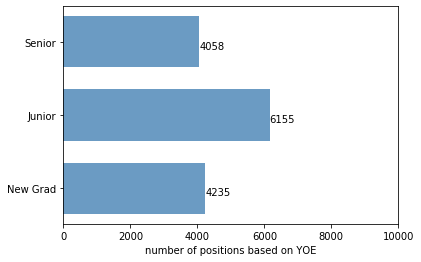

In [58]:
plt.figure()
plt.barh(range(3), data, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(3), labels)
plt.xlim(0,10000)
plt.xlabel("number of positions based on YOE")
plt.title("")
for x, y in enumerate(data):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

In [59]:
kaggle_data['jobtitle'].value_counts()

Java Developer                                                                                 174
Project Manager                                                                                145
Network Engineer                                                                               128
Software Engineer                                                                              118
Business Analyst                                                                               117
.Net Developer                                                                                  70
DevOps Engineer                                                                                 60
Systems Engineer                                                                                55
Systems Administrator                                                                           54
Web Developer                                                                                   53
Senior Sof